## LIBs

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report

## FUNS

In [26]:
def check_shape(x_train,x_test,y_train,y_test):
    print('x_train shape: ',x_train.shape)
    print('y_train shape: ',y_train.shape)
    print('--'*20)
    print('x_test shape: ',x_test.shape)
    print('y_test shape: ',y_test.shape)

In [30]:
def train_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    
    print('Classification Report for Test Data')
    print('--'*20)
    print(classification_report(y_test,test_pred))
    print('=='*25)
    print('Classification Report for Train Data')
    print('--'*20)
    print(classification_report(y_train,train_pred))
    
    cm_train  = confusion_matrix(y_train,train_pred)
    cm_test  = confusion_matrix(y_test,test_pred)

    return cm_train,cm_test

## DATA

In [10]:
df = pd.read_csv(r"D:\Work\Route\HTI\S9\Decision Trees & Random Forest\kyphosis.csv")

In [12]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [16]:
df['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

## Preprocessing

In [19]:
x = df.drop(['Kyphosis'],axis = 1)
y = df['Kyphosis']

In [21]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [32]:
x_train, x_test, y_train,y_test = train_test_split(x,y,
                                                   test_size = 0.2, 
                                                   shuffle = True, 
                                                   random_state = 0)

## Modeling

### DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_model = DecisionTreeClassifier()

In [39]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

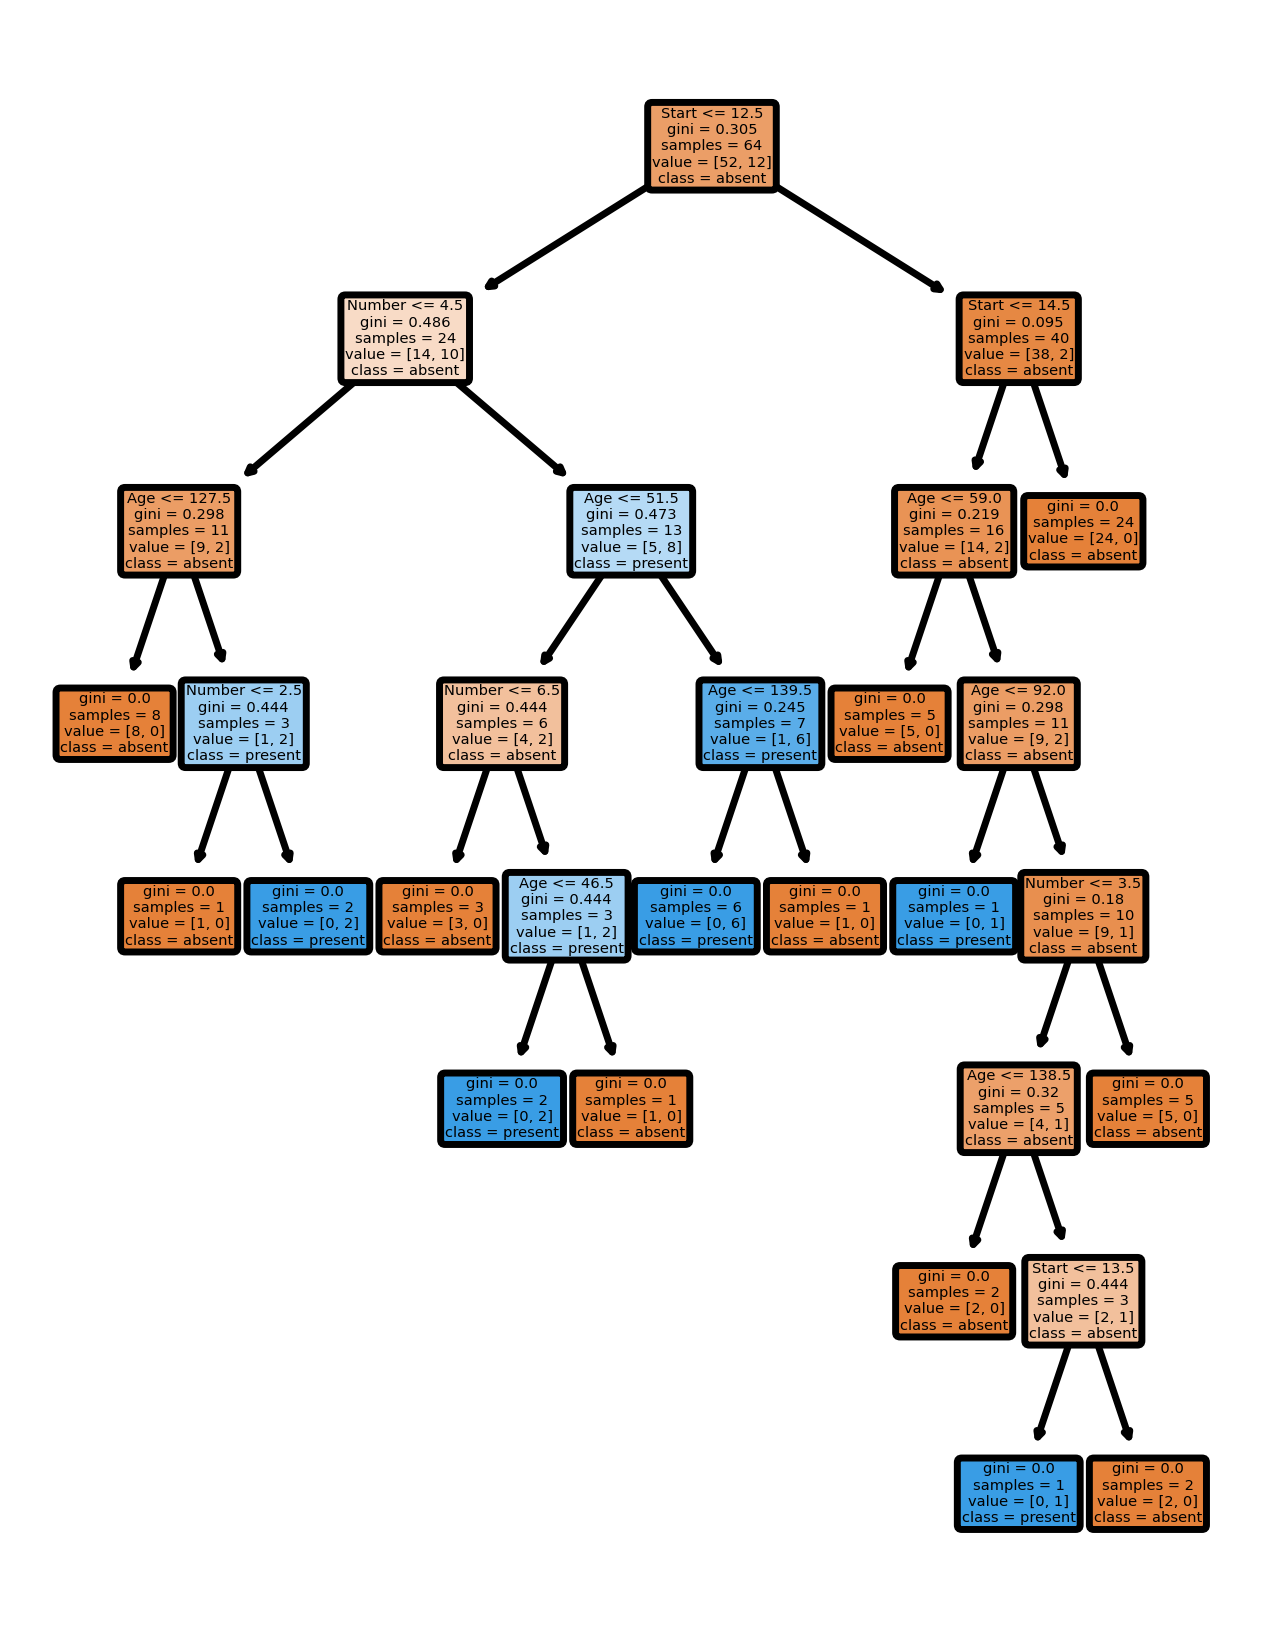

In [73]:
from sklearn import tree

fig = plt.figure(figsize = (3,4),dpi=500)
tree.plot_tree(dt_model,
              feature_names = ['Age', 'Number', 'Start'],
              class_names = ['absent','present'],
              filled = True,
              rounded = True)

plt.show()

In [77]:
dt_train_pred = dt_model.predict(x_train)
dt_test_pred = dt_model.predict(x_test)

In [79]:
print(accuracy_score(y_train, dt_train_pred)*100)
print(accuracy_score(y_test, dt_test_pred)*100)

100.0
76.47058823529412


In [81]:
print(classification_report(y_test, dt_test_pred))

              precision    recall  f1-score   support

      absent       0.83      0.83      0.83        12
     present       0.60      0.60      0.60         5

    accuracy                           0.76        17
   macro avg       0.72      0.72      0.72        17
weighted avg       0.76      0.76      0.76        17



### RandomForestClassifier

#### Def

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_model = RandomForestClassifier()

In [87]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [89]:
rf_train_pred = rf_model.predict(x_train)
rf_test_pred = rf_model.predict(x_test)

In [91]:
print(accuracy_score(y_train, rf_train_pred)*100)
print(accuracy_score(y_test, rf_test_pred)*100)

100.0
64.70588235294117


In [157]:
rf2_model = RandomForestClassifier(n_estimators = 2,random_state=  20)
rf2_model.fit(x_train, y_train)
rf_train2_pred = rf2_model.predict(x_train)
rf_test2_pred = rf2_model.predict(x_test)
print(accuracy_score(y_train, rf_train2_pred)*100)
print(accuracy_score(y_test, rf_test2_pred)*100)

92.1875
76.47058823529412


In [135]:
print(classification_report(y_train, rf_train2_pred))

              precision    recall  f1-score   support

      absent       0.88      1.00      0.94        52
     present       1.00      0.42      0.59        12

    accuracy                           0.89        64
   macro avg       0.94      0.71      0.76        64
weighted avg       0.90      0.89      0.87        64



In [137]:
print(classification_report(y_test, dt_test_pred))

              precision    recall  f1-score   support

      absent       0.83      0.83      0.83        12
     present       0.60      0.60      0.60         5

    accuracy                           0.76        17
   macro avg       0.72      0.72      0.72        17
weighted avg       0.76      0.76      0.76        17



#### Sampling -- OVER

In [163]:
df['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [165]:
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 'minority')

In [167]:
x_over , y_over = over_sample.fit_resample(x,y)

In [169]:
y_over.value_counts()

Kyphosis
absent     64
present    64
Name: count, dtype: int64

In [171]:
x_train_over, x_test_over, y_train_over,y_test_over = train_test_split(x_over,y_over,
                                                   test_size = 0.2, 
                                                   shuffle = True, 
                                                   random_state = 0)

In [178]:
rf_over_model = RandomForestClassifier(n_estimators = 3,random_state=  20)

rf_over_model.fit(x_train_over, y_train_over)


rf_train2_pred = rf_over_model.predict(x_train_over)
rf_test2_pred = rf_over_model.predict(x_test_over)


print(accuracy_score(y_train_over, rf_train2_pred)*100)
print(accuracy_score(y_test_over, rf_test2_pred)*100)

98.0392156862745
88.46153846153845


In [180]:
print(classification_report(y_train_over, rf_train2_pred))

              precision    recall  f1-score   support

      absent       1.00      0.96      0.98        54
     present       0.96      1.00      0.98        48

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102



In [184]:
print(classification_report(y_test_over, rf_test2_pred))

              precision    recall  f1-score   support

      absent       0.82      0.90      0.86        10
     present       0.93      0.88      0.90        16

    accuracy                           0.88        26
   macro avg       0.88      0.89      0.88        26
weighted avg       0.89      0.88      0.89        26



## EX 

1 - read the data -->  loan_data.csv
2- info 
3- split data
4- Apply --> DT
5- Apply --> RF
6- leave ur comment